In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

place = "Canada"

# Import the data from the API
url = f"https://api.covid19api.com/dayone/country/{place.lower()}"
response = requests.get(url)
# Convert the response to a list of dictionaries.
data = response.json()

# Display the first 3 days of data
data[:3]


[{'ID': '0e723732-70bb-4e0e-8a18-77f53412cbad',
  'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '56.13',
  'Lon': '-106.35',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-23T00:00:00Z'},
 {'ID': '4ab45a2c-c7ea-4e15-880d-d26e30ec3860',
  'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '56.13',
  'Lon': '-106.35',
  'Confirmed': 3,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 3,
  'Date': '2020-01-24T00:00:00Z'},
 {'ID': 'f7f8858e-e495-41be-8acd-354746c9255a',
  'Country': 'Canada',
  'CountryCode': 'CA',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '56.13',
  'Lon': '-106.35',
  'Confirmed': 3,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 3,
  'Date': '2020-01-25T00:00:00Z'}]

In [2]:
# Display the data as a Pandas DataFrame
pd.DataFrame(data)


,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,0e723732-70bb-4e0e-8a18-77f53412cbad,Canada,CA,,,,56.13,-106.35,2,0,0,2,2020-01-23T00:00:00Z
1,4ab45a2c-c7ea-4e15-880d-d26e30ec3860,Canada,CA,,,,56.13,-106.35,3,0,0,3,2020-01-24T00:00:00Z
2,f7f8858e-e495-41be-8acd-354746c9255a,Canada,CA,,,,56.13,-106.35,3,0,0,3,2020-01-25T00:00:00Z
3,f2f9c37b-2025-47bb-81d0-3374e32b1980,Canada,CA,,,,56.13,-106.35,3,0,0,3,2020-01-26T00:00:00Z
4,20ea5bfd-c217-46b8-9abe-07a137dbe859,Canada,CA,,,,56.13,-106.35,3,0,0,3,2020-01-27T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,652ae3ec-7a94-4a7b-91e9-78b4e55bebf6,Canada,CA,,,,56.13,-106.35,3980778,45952,0,3934826,2023-03-05T00:00:00Z
1138,f97aed5d-29c1-40d9-acf3-422587ea971a,Canada,CA,,,,56.13,-106.35,3982455,45989,0,3936466,2023-03-06T00:00:00Z
1139,f77ef104-4840-46cb-834c-80e7400cf0a8,Canada,CA,,,,56.13,-106.35,3983246,46002,0,3937244,2023-03-07T00:00:00Z
1140,bc2ca06b-8724-489f-b5c8-908627e5e41a,Canada,CA,,,,56.13,-106.35,3983759,46011,0,3937748,2023-03-08T00:00:00Z


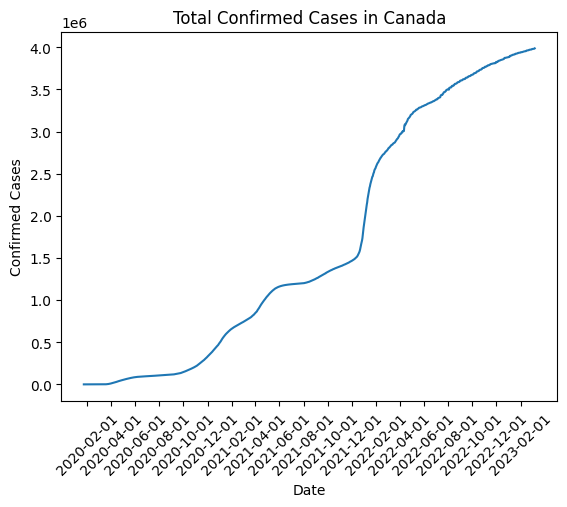

In [3]:
# Create a line chart showing the total number of confirmed cases in Canada
# over time.
confirmed_cases = [day["Confirmed"] for day in data]
# Extract the date from each day.
dates = [day["Date"][:10] for day in data]
# Make every 2nd month a tick label.
date_ticks = [date for date in dates if date[8:] == "01"][::2]

plt.plot(dates, confirmed_cases)
plt.title(f"Total Confirmed Cases in {place}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(date_ticks, rotation=45)

plt.savefig("confirmed_cases.png", bbox_inches="tight")
plt.show()


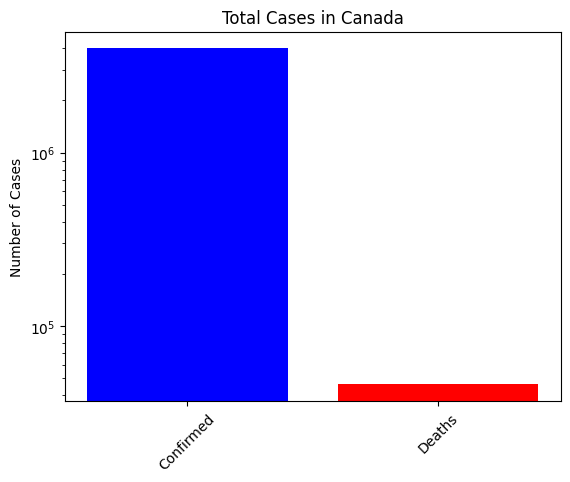

In [4]:
# Create a bar chart showing the total number of confirmed cases and deaths in
# Canada.
confirmed_cases = [day["Confirmed"] for day in data]
deaths = [day["Deaths"] for day in data]

total_confirmed = confirmed_cases[-1]
total_deaths = deaths[-1]

data = [total_confirmed, total_deaths]

x = ["Confirmed", "Deaths"]

plt.bar(x, data, color=["blue", "red"], log=True)

plt.title(f"Total Cases in {place}")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)

plt.savefig("total_cases.png", bbox_inches="tight")
plt.show()


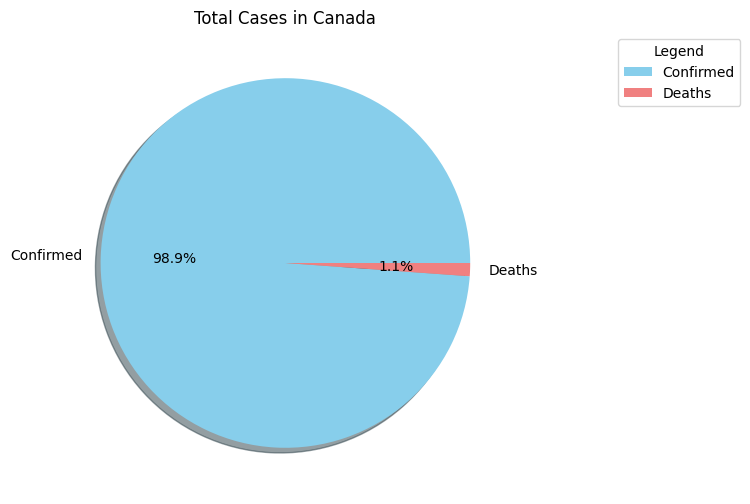

In [5]:
# Create a pie chart showing the percentage of confirmed cases and deaths in
# Canada.
labels = ["Confirmed", "Deaths"]
sizes = [total_confirmed, total_deaths]
colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True)
plt.legend(title="Legend", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f"Total Cases in {place}")

plt.savefig("pie_chart.png", bbox_inches="tight")
plt.show()
